In [2]:
import requests
from bs4 import BeautifulSoup

requests ile web sitesinden veri almak için kullanılır ,URL ye HTTP isteği gönderir ve döner.
beautiful soup ile gelen html kodunu anlamlı bir şekilde parçalar

In [3]:
url = "https://realpython.github.io/fake-jobs/"
html = requests.get(url).content
soup = BeautifulSoup(html,'html.parser')

requests ile web sayfasının içeriğini çekiyorsun.
BeautifulSoup ile o içeriği parçalayıp anlamlı parçalara (etiketler, metinler, vs.) ayırıyorsun.

In [4]:
job_elements = soup.find_all("div",class_="card-content")

burada ki iş lokasyon şirket isimlerini barındıran div class=card content içeriğini alıyorsun

In [5]:
jobs = []
for job_element in job_elements:
    title = job_element.find("h2", class_="title")
    company = job_element.find("h3", class_="company")
    location = job_element.find("p", class_="location")
    
    if title and company and location:
        print(f"İş: {title.text.strip()}")
        print(f"Firma: {company.text.strip()}")
        print(f"Lokasyon: {location.text.strip()}")
        print("-----------")


        job = {
        "title": title.text.strip(),
        "company": company.text.strip(),
        "location":location.text.strip()
    }

    jobs.append(job)
        


İş: Senior Python Developer
Firma: Payne, Roberts and Davis
Lokasyon: Stewartbury, AA
-----------
İş: Energy engineer
Firma: Vasquez-Davidson
Lokasyon: Christopherville, AA
-----------
İş: Legal executive
Firma: Jackson, Chambers and Levy
Lokasyon: Port Ericaburgh, AA
-----------
İş: Fitness centre manager
Firma: Savage-Bradley
Lokasyon: East Seanview, AP
-----------
İş: Product manager
Firma: Ramirez Inc
Lokasyon: North Jamieview, AP
-----------
İş: Medical technical officer
Firma: Rogers-Yates
Lokasyon: Davidville, AP
-----------
İş: Physiological scientist
Firma: Kramer-Klein
Lokasyon: South Christopher, AE
-----------
İş: Textile designer
Firma: Meyers-Johnson
Lokasyon: Port Jonathan, AE
-----------
İş: Television floor manager
Firma: Hughes-Williams
Lokasyon: Osbornetown, AE
-----------
İş: Waste management officer
Firma: Jones, Williams and Villa
Lokasyon: Scotttown, AP
-----------
İş: Software Engineer (Python)
Firma: Garcia PLC
Lokasyon: Ericberg, AE
-----------
İş: Interpreter

Döngü ile her iş ilanını teker teker işliyorsun:

title, company, location elementlerini buluyorsun.

Hepsi varsa (if title and company and location) iş ilanını ekrana yazdırıyorsun.

Sonra temizlenmiş (.text.strip()) verilerle bir job sözlüğü (dictionary) oluşturuyorsun.

Bu job sözlüğünü jobs listesine ekliyorsun.

In [6]:
python_jobs = [job for job in jobs if "python" in job["title"].lower()]

for job in python_jobs:
    print(f"{job['title']} - {job['company']} ({job['location']})")




Senior Python Developer - Payne, Roberts and Davis (Stewartbury, AA)
Software Engineer (Python) - Garcia PLC (Ericberg, AE)
Python Programmer (Entry-Level) - Moss, Duncan and Allen (Port Sara, AE)
Python Programmer (Entry-Level) - Cooper and Sons (West Victor, AE)
Software Developer (Python) - Adams-Brewer (Brockburgh, AE)
Python Developer - Rivera and Sons (East Michaelfort, AA)
Back-End Web Developer (Python, Django) - Stewart-Alexander (South Kimberly, AA)
Back-End Web Developer (Python, Django) - Jackson, Ali and Mckee (New Elizabethside, AA)
Python Programmer (Entry-Level) - Mathews Inc (Robertborough, AP)
Software Developer (Python) - Moreno-Rodriguez (Martinezburgh, AE)


In [14]:
import pandas as pd

# python_jobs zaten list of dict formatında
df = pd.DataFrame(python_jobs)

# DataFrame'i görüntüleyelim
print(df.head())


                             title                   company         location
0          Senior Python Developer  Payne, Roberts and Davis  Stewartbury, AA
1       Software Engineer (Python)                Garcia PLC     Ericberg, AE
2  Python Programmer (Entry-Level)    Moss, Duncan and Allen    Port Sara, AE
3  Python Programmer (Entry-Level)           Cooper and Sons  West Victor, AE
4      Software Developer (Python)              Adams-Brewer   Brockburgh, AE


jobs listesinden sadece başlığında "python" kelimesi geçen ilanları filtreliyorsun.
Son olarak bu python_jobs listesini yazdırıyorsun.

In [12]:
from collections import Counter

titles = [job['title'].strip() for job in python_jobs]
title_counts = Counter(titles)


Counter, Python’un koleksiyonlar modülünden geliyor. Bir listedeki öğelerin kaç kere tekrar ettiğini saymak için çok kullanışlı.

-python_jobs listesindeki her iş ilanının başlığını (title) alıyor.

.strip() ile başlıkların başındaki ve sonundaki boşlukları temizliyor.

Sonuçta, sadece Python ile ilgili işlerin başlıklarından oluşan bir liste oluşturuyor.

-titles listesindeki aynı başlıkların kaç kere tekrar ettiğini sayıyor.

Örneğin, “Python Developer” kaç tane var, “Senior Python Engineer” kaç tane var diye sayıyor.

title_counts adında bir sözlük (dictionary) gibi çalışan ama otomatik sayan bir obje oluşuyor.

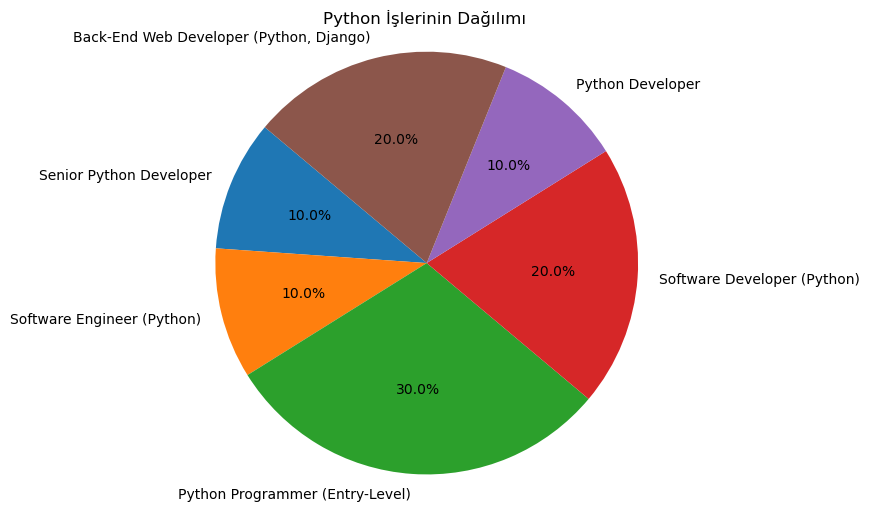

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(title_counts.values(), labels=title_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Python İşlerinin Dağılımı ')
plt.axis('equal')  # Daire görünmesi için
plt.show()


-Grafik çizmek için matplotlib.pyplot kütüphanesini yüklüyorsun.
-Grafik alanını 6x6 inç boyutlarında ayarlıyorsun.
-plt.pie() fonksiyonu pasta grafiği çiziyor.

title_counts.values() dilimlerin büyüklükleri, yani her iş başlığının kaç tane olduğu.

labels=title_counts.keys() dilimlerin etiketleri, yani iş başlıkları.

autopct='%1.1f%%' her dilimin üzerine yüzde kaç olduğunu yazıyor (1.1f → 1 basamak ondalık).

startangle=140 grafik başlangıç açısını ayarlıyor, böylece pasta daha hoş görünüyor.
-Grafik alanının x ve y eksen oranını eşit yapıyor, böylece pasta dairesel görünüyor (aksi halde oval olabilir).